In [1]:
# Problem Statement: Suppose we have data for a retail company. The company 
# wants to understand how their advertising expenses in various channels 
# (e.g., TV, Radio) impact sales.

# Linear Regression: Predict sales using only TV advertising expenses.
# Multiple Regression: Predict sales using both TV and Radio advertising expenses.

In [27]:
import numpy as np
import pandas as pd

np.random.seed(0)
tv = 100 + 50*np.random.rand(100)
radio = 50 + 25*np.random.rand(100)
sales = 200 + 3*tv + 1.5*radio + 30*np.random.randn(100)

data = pd.DataFrame({'TV':tv, 'Radio':radio, 'Sales':sales})
data.head()

,TV,Radio,Sales
0,127.440675,66.945413,716.539223
1,135.759468,56.750199,660.005759
2,130.138169,68.379851,658.560223
3,127.244159,74.054714,679.679947
4,121.182740,56.218829,632.935489


In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 0)

In [29]:
#Linear Regression
#Using Only TV expenses for prediction

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_tv = train[['TV']]
y_train = train['Sales']
X_test_tv = test[['TV']]
y_test = test['Sales']

linear_model = LinearRegression().fit(X_train_tv, y_train)
linear_pred = linear_model.predict(X_test_tv)

linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

In [30]:
#Multiple Regression
#Using both TV and Radio expenses for prediction

X_train_multi = train[['TV', 'Radio']]
X_test_multi = test[['TV', 'Radio']]

multiple_model = LinearRegression().fit(X_train_multi, y_train)
multiple_pred = multiple_model.predict(X_test_multi)

multiple_rmse = np.sqrt(mean_squared_error(y_test, multiple_pred))


In [31]:
print(f'Linear Regression RMSE: {linear_rmse:2f}')
print(f'Multiple Regression RMSE: {multiple_rmse:2f}')

Linear Regression RMSE: 27.175508
Multiple Regression RMSE: 25.267491


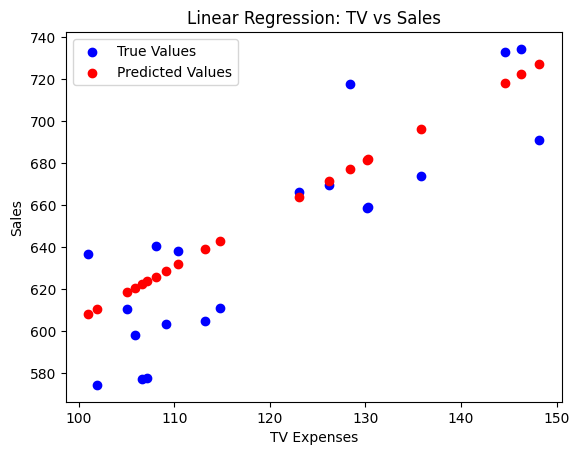

Linear Regression RMSE: 27.175508
Multiple Regression RMSE: 25.267491


In [32]:
#For Linear Regression:
import matplotlib.pyplot as plt

plt.scatter(X_test_tv, y_test, color='blue', label = 'True Values')
plt.scatter(X_test_tv, linear_pred, color = 'red', label = 'Predicted Values')
plt.xlabel('TV Expenses')
plt.ylabel('Sales')
plt.title('Linear Regression: TV vs Sales')
plt.legend()
plt.show()

print(f'Linear Regression RMSE: {linear_rmse:2f}')
print(f'Multiple Regression RMSE: {multiple_rmse:2f}')



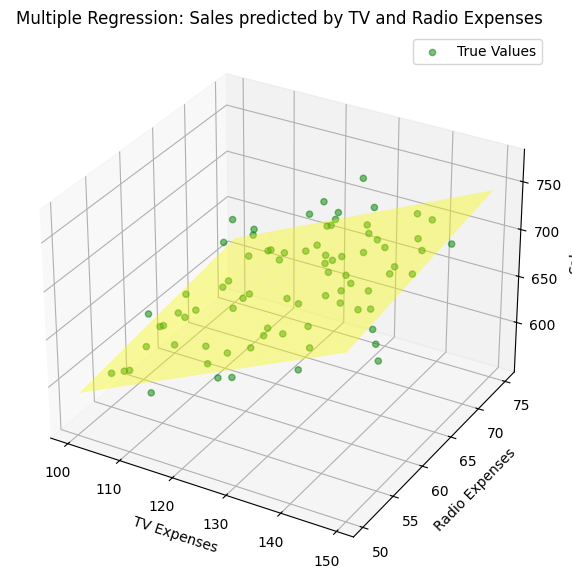

In [40]:
# Multile Regression:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(train['TV'], train['Radio'], train['Sales'], color='green', 
           marker = 'o', alpha = 0.5, label = 'True Values')

x_surf = np.linspace(train['TV'].min(), train['TV'].max(), 100)
y_surf = np.linspace(train['Radio'].min(), train['Radio'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

vals = pd.DataFrame({'TV':x_surf.ravel(), 'Radio':y_surf.ravel()})
predicted_sales = multiple_model.predict(vals)
ax.plot_surface(x_surf, y_surf, predicted_sales.reshape(x_surf.shape), color = 'yellow', alpha = 0.4)

ax.set_xlabel('TV Expenses')
ax.set_ylabel('Radio Expenses')
ax.set_zlabel('Sales')
ax.set_title('Multiple Regression: Sales predicted by TV and Radio Expenses')
ax.legend()

plt.show()


In [41]:
# 1. Problem Statement
# Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media. Suppose that in our role as Data Scientist we are asked to suggest.

# We want to find a function that given input budgets for TV, radio and newspaper predicts the output sales.

# Which media contribute to sales?

# Visualize the relationship between the features and the response using scatter plots.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
import numpy as np

%matplotlib inline